In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [3]:
df=pd.read_csv("states_data_car")
df.head(10)

,state,capital,subsidy,road tax,petrol,diesel
0,Andhra Pradesh,Amaravati,0.0,1.0,111.65,99.41
1,Arunachal Pradesh,Itanagar,5000.0,0.0,95.89,84.81
2,Assam,Dispur,10000.0,1.0,96.34,84.24
3,Bihar,Patna,10000.0,1.0,109.17,95.82
4,Chhattisgarh,Raipur,5000.0,0.0,102.98,95.96
5,Goa,Panaji,8000.0,1.0,97.82,90.37
6,Gujarat,Gandhinagar,10000.0,0.5,96.49,92.23
7,Haryana,Chandigarh,0.0,0.0,97.24,90.08
8,Himachal Pradesh,Shimla,5000.0,0.0,95.74,81.99
9,Jharkhand,Ranchi,5000.0,0.0,100.09,94.88


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     36 non-null     object 
 1   capital   36 non-null     object 
 2   subsidy   36 non-null     float64
 3   road tax  36 non-null     float64
 4   petrol    36 non-null     float64
 5   diesel    36 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.8+ KB


In [5]:
df.isnull().sum()

state       0
capital     0
subsidy     0
road tax    0
petrol      0
diesel      0
dtype: int64

In [6]:
# Sorting the data by 'subsidy' in ascending order
df = df.sort_values(by='subsidy')

In [7]:
df.tail()

,state,capital,subsidy,road tax,petrol,diesel
6,Gujarat,Gandhinagar,10000.0,0.5,96.49,92.23
27,West Bengal,kolkata,10000.0,1.0,106.79,93.47
3,Bihar,Patna,10000.0,1.0,109.17,95.82
31,Delhi,Delhi,10000.0,1.0,96.72,89.62
2,Assam,Dispur,10000.0,1.0,96.34,84.24


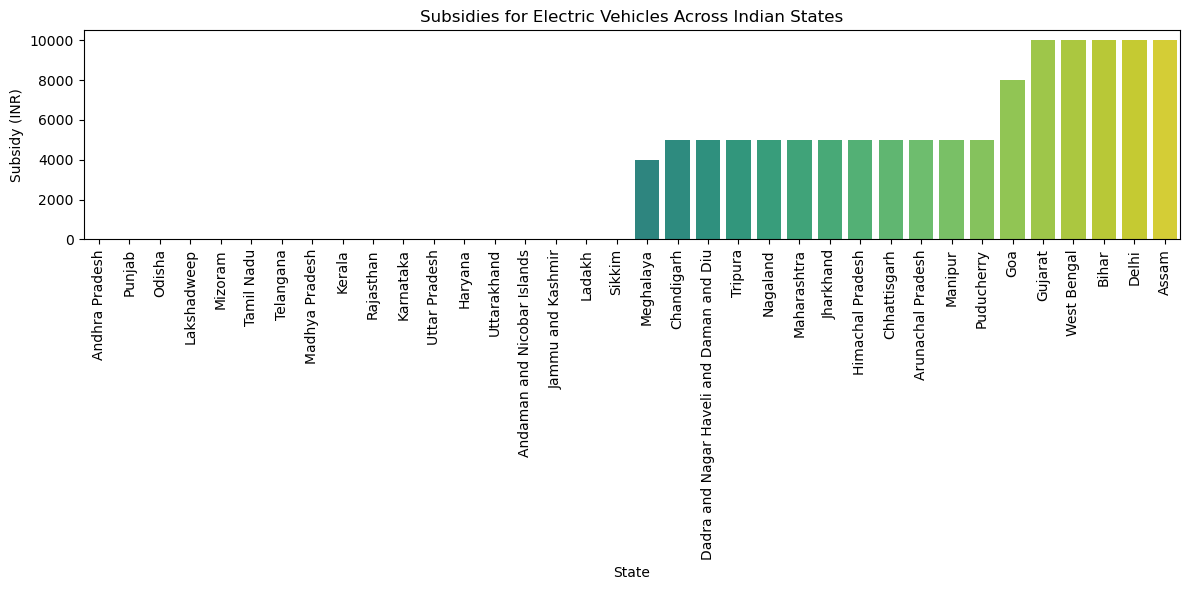

In [8]:
# Bar Chart for Subsidy Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='subsidy', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Subsidy (INR)')
plt.title('Subsidies for Electric Vehicles Across Indian States')
plt.tight_layout()
plt.show()

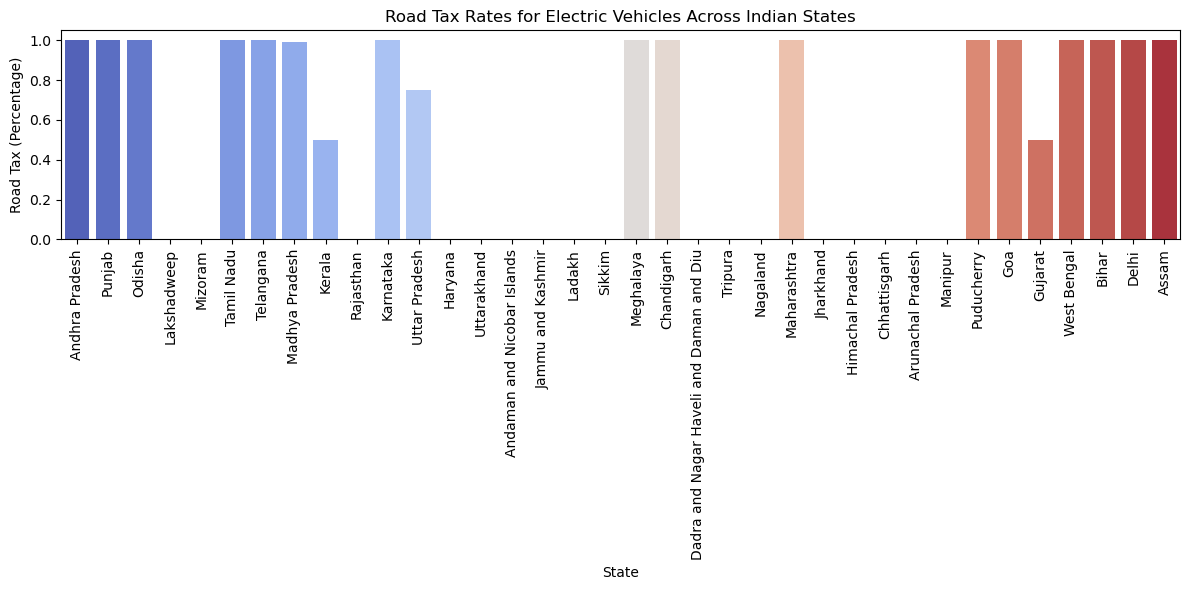

In [10]:
# Bar Chart for Road Tax Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='road tax', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Road Tax (Percentage)')
plt.title('Road Tax Rates for Electric Vehicles Across Indian States')
plt.tight_layout()
plt.show()


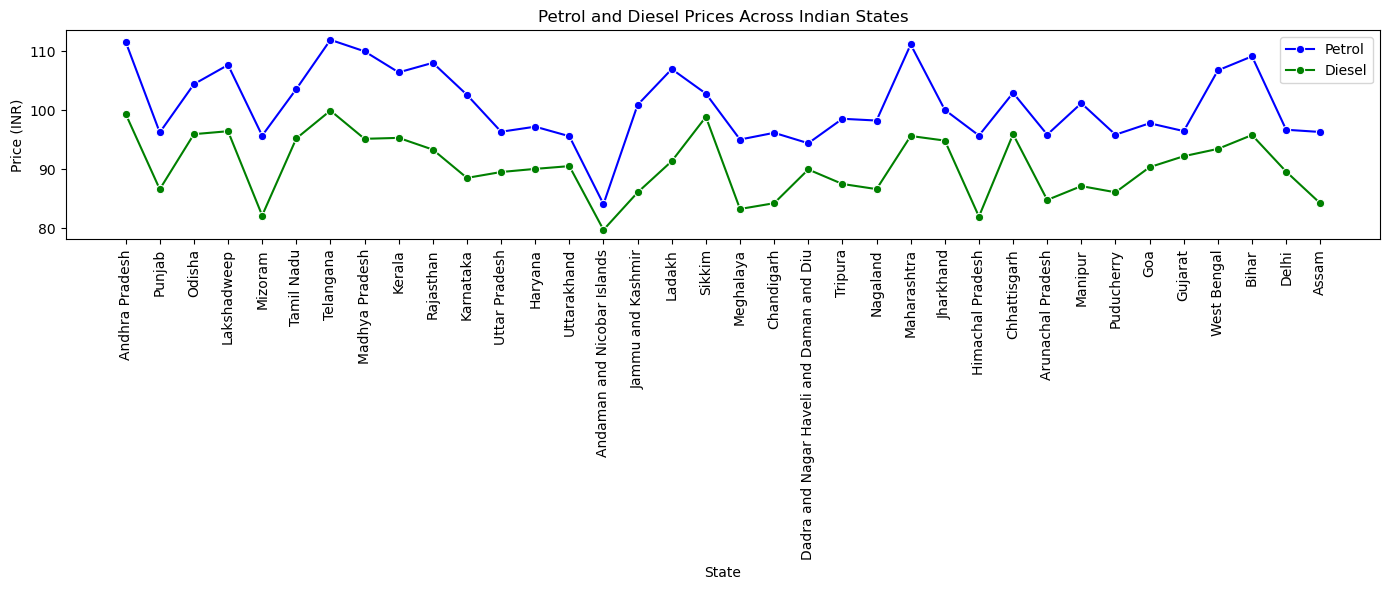

In [11]:
# Line Chart for Petrol Prices
plt.figure(figsize=(14, 6))
sns.lineplot(x='state', y='petrol', data=df, marker='o', label='Petrol', color='b')
sns.lineplot(x='state', y='diesel', data=df, marker='o', label='Diesel', color='g')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Price (INR)')
plt.title('Petrol and Diesel Prices Across Indian States')
plt.legend()
plt.tight_layout()
plt.show()

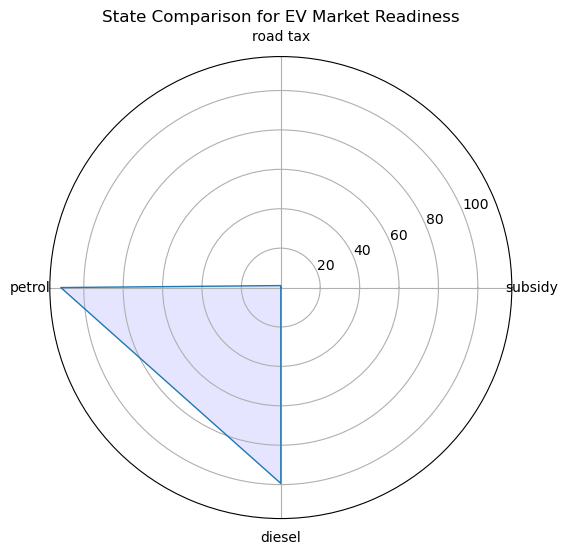

In [13]:
from math import pi

# Radar Chart for State Comparison
categories = ['subsidy', 'road tax', 'petrol', 'diesel']
N = len(categories)

# Prepare data
values = df.loc[0, categories].tolist()
values += values[:1]  # Repeat the first value to close the circle

# Create angles for the radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)

# Add labels
plt.xticks(angles[:-1], categories)

# Add a title
plt.title('State Comparison for EV Market Readiness')
plt.show()

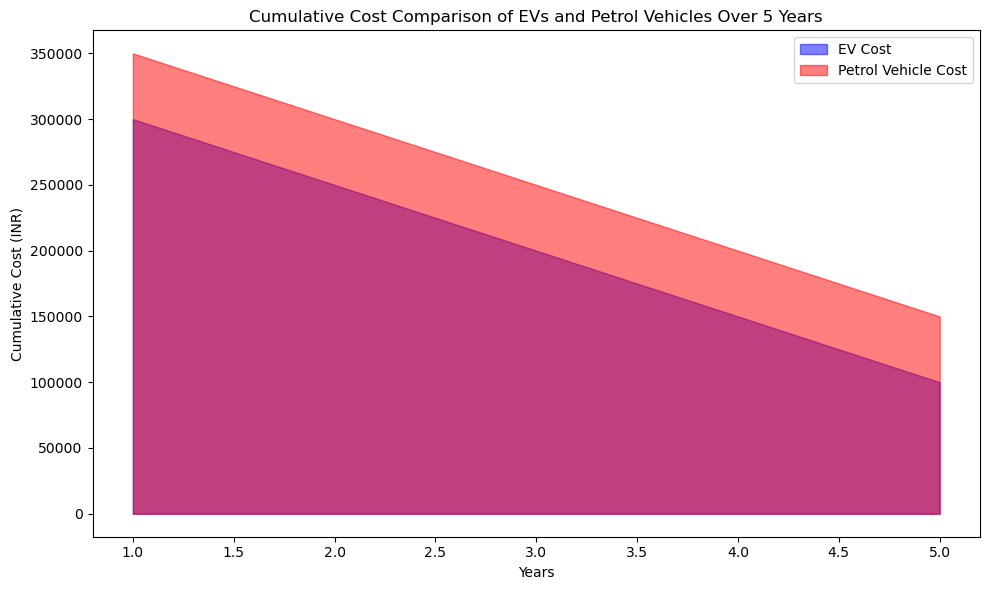

In [14]:
# Assuming we have cost data for this example
years = [1, 2, 3, 4, 5]
ev_cost = [300000, 250000, 200000, 150000, 100000]
petrol_cost = [350000, 300000, 250000, 200000, 150000]

plt.figure(figsize=(10, 6))
plt.fill_between(years, ev_cost, color='b', alpha=0.5, label='EV Cost')
plt.fill_between(years, petrol_cost, color='r', alpha=0.5, label='Petrol Vehicle Cost')
plt.xlabel('Years')
plt.ylabel('Cumulative Cost (INR)')
plt.title('Cumulative Cost Comparison of EVs and Petrol Vehicles Over 5 Years')
plt.legend()
plt.tight_layout()
plt.show()

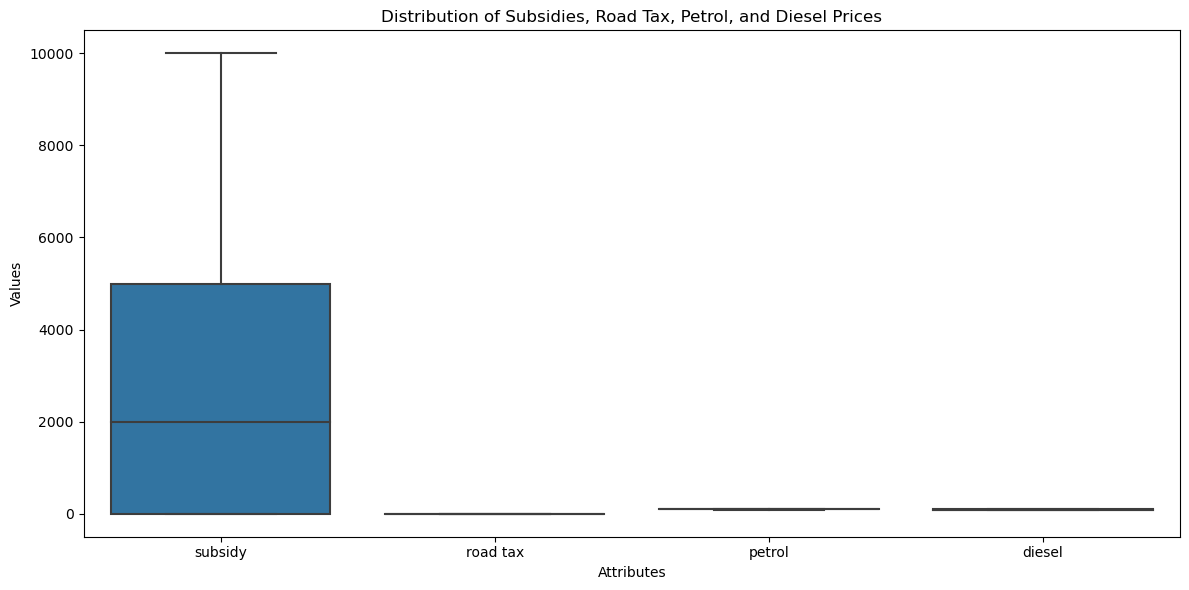

In [16]:
# Box Plot for Data Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['subsidy', 'road tax', 'petrol', 'diesel']])
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.title('Distribution of Subsidies, Road Tax, Petrol, and Diesel Prices')
plt.tight_layout()
plt.show()